In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import losses, metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import keras_nlp
import keras
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression

In [93]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [94]:
nltk.download('stopwords')
language = "english"

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sw = stopwords.words(language)
stemmer = SnowballStemmer(language)

In [96]:
X = train_df['text'].tolist()

In [97]:
X = [i.lower() for i in X]

In [98]:
X[0:10]

['our deeds are the reason of this #earthquake may allah forgive us all',
 'forest fire near la ronge sask. canada',
 "all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in california ',
 'just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school ',
 '#rockyfire update => california hwy. 20 closed in both directions due to lake county fire - #cafire #wildfires',
 '#flood #disaster heavy rain causes flash flooding of streets in manitou, colorado springs areas',
 "i'm on top of the hill and i can see a fire in the woods...",
 "there's an emergency evacuation happening now in the building across the street",
 "i'm afraid that the tornado is coming to our area..."]

In [99]:
tfidf = TfidfVectorizer(stop_words=None, tokenizer=lambda x: [stemmer.stem(i) for i in x.split()])
X = tfidf.fit_transform(X)
y = train_df['target']

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [100]:
X.shape

(7613, 24638)

In [101]:
from sklearn.model_selection import train_test_split
# Dividi i dati in set di addestramento e validazione
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [102]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(24638,)),
    #Dense(64, activation='relu'),
    #Dense(128, activation='relu'),
    #Dense(128, activation='relu'),
    #Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.compile(optimizer=Adam(learning_rate=0.001),
            loss=keras.losses.BinaryCrossentropy(),
            metrics=[
                keras.metrics.BinaryAccuracy(),
                keras.metrics.FalseNegatives(),
            ],)

In [104]:
# Addestra il modello
history = model.fit(x_train, y_train, epochs=3, batch_size=None, verbose=1)

Epoch 1/3
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - binary_accuracy: 0.6626 - false_negatives_8: 899.3021 - loss: 0.6485
Epoch 2/3
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - binary_accuracy: 0.8859 - false_negatives_8: 275.0990 - loss: 0.3556
Epoch 3/3
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - binary_accuracy: 0.9465 - false_negatives_8: 126.2656 - loss: 0.1965


In [105]:
predictions_train_nn = model.predict(x_train)
predictions_val_nn = model.predict(x_val)

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [106]:
predictions_train_nn = np.array(list(map(lambda x: 0 if x <= 0.5 else 1, predictions_train_nn.flatten())))
predictions_train_nn.shape

(6090,)

In [107]:
predictions_val_nn = np.array(list(map(lambda x: 0 if x <= 0.5 else 1, predictions_val_nn.flatten())))
predictions_val_nn.shape

(1523,)

In [108]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,  # Rimuovi np.argmax
        display_labels=["Not Disaster","Disaster"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

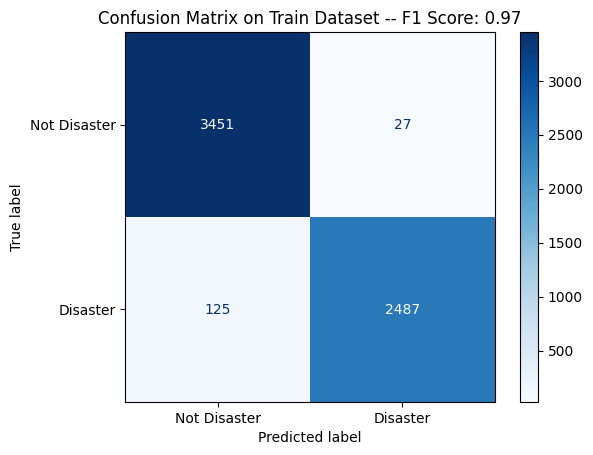

In [109]:
displayConfusionMatrix(y_train, predictions_train_nn,"Train")

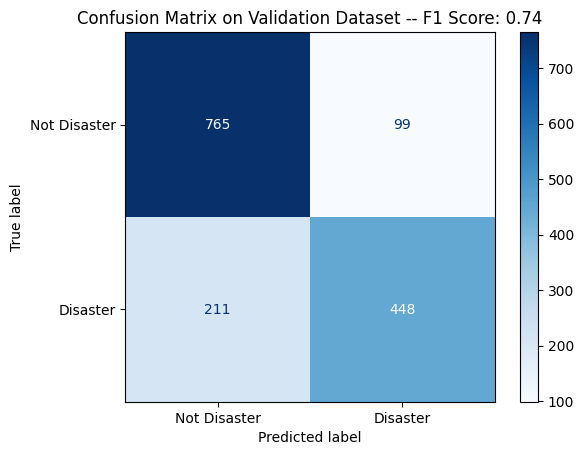

In [110]:
displayConfusionMatrix(y_val, predictions_val_nn,"Validation")

**Training the model on the whole dataset in order to make the submission**

In [111]:
X_test = test_df['text'].tolist()
X_test = [i.lower() for i in X_test]
X_test = tfidf.transform(X_test)

In [112]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(24638,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
            loss=keras.losses.BinaryCrossentropy(),
            metrics=[
                keras.metrics.BinaryAccuracy(),
                keras.metrics.FalseNegatives(),
            ],) 

history = model.fit(X, y, epochs=3, batch_size=None, verbose=1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - binary_accuracy: 0.6678 - false_negatives_9: 987.8954 - loss: 0.5998
Epoch 2/3
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.9327 - false_negatives_9: 164.4644 - loss: 0.1829
Epoch 3/3
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.9779 - false_negatives_9: 43.9540 - loss: 0.0618


In [113]:
X_test.shape


(3263, 24638)

In [114]:
output = model.predict(X_test)
output.shape

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(3263, 1)

In [115]:
output = np.array(list(map(lambda x: 0 if x <= 0.7 else 1,output.flatten())))

In [116]:
submission_df = pd.DataFrame({'Id': test_df['id'], 'target': output})

In [117]:
submission_df.to_csv('sample_submission.csv', index=False, sep=',')